<a href="https://colab.research.google.com/github/Gabxist/I.C./blob/main/An%C3%A1lise_de_dados_%22GPS%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from pandas.plotting import autocorrelation_plot

In [40]:
# Importar repósitorio de GitHub
!rm -r I.C
!git clone https://github.com/Gabxist/I.C..git

rm: cannot remove 'I.C': No such file or directory
fatal: destination path 'I.C.' already exists and is not an empty directory.


In [94]:
gps = read_csv('/content/I.C./Gps_NAUS.txt',names=['DATE','TIME','DECIMAL DATE','MJD','U'], sep=r'\s+')

In [95]:
#Deixando apenas os ultimos 10 anos:
remover = gps[(gps['DECIMAL DATE']<2010)|(gps['DECIMAL DATE']>2020)]
gps = gps.drop(remover.index)

In [96]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = gps["U"].quantile(0.25)
q3 = gps['U'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = gps[(gps['U']<tol_min)|(gps['U']> tol_max)]
print(outliers)

            DATE      TIME  DECIMAL DATE      MJD          U
2343  15/12/2012  12:00:00   2012.954918  56276.5  78.136257
2344  16/12/2012  12:00:00   2012.957650  56277.5  84.477328


In [97]:
gps_o = gps.drop(outliers.index)

In [98]:
#retirando a média
média = np.mean(gps['U'])
gps['U'] = gps['U'] - média
print(f'Média dos dados "U": {média:.2f}')
média = np.mean(gps_o['U'])
gps_o['U'] = gps_o['U'] - média
print(f'Média dos dados "U" sem outliers: {média:.2f}')

Média dos dados "U": -5.27
Média dos dados "U" sem outliers: -5.32


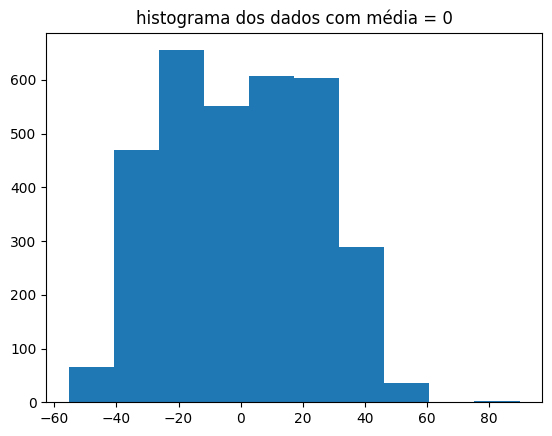

In [99]:
plt.hist(gps['U'])
plt.title('histograma dos dados com média = 0')
plt.show()

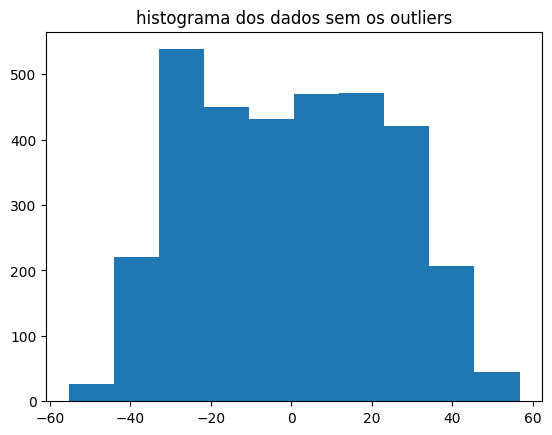

In [100]:
plt.hist(gps_o['U'])
plt.title('histograma dos dados sem os outliers')
plt.show()

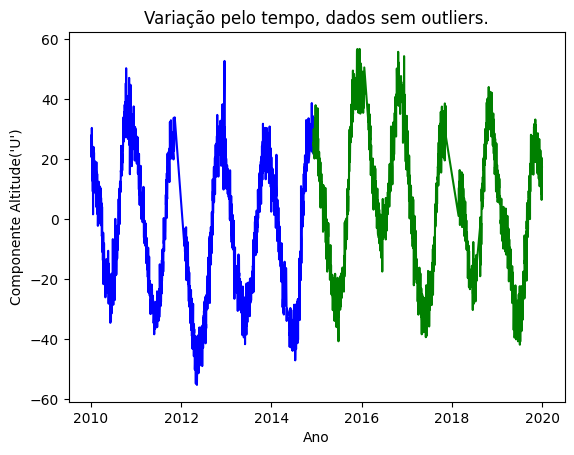

primeira metade, variância = 534.5308579407011 média = -4.732930755906695
segunda metade, variância = 549.9853001753089 média = 4.730043061729815
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.5987966982800148.


In [106]:
metade = round(len(gps_o)/2)
div1, div2 = gps_o["U"].to_numpy()[0:metade], gps_o["U"].to_numpy()[metade:]
time1, time2 = gps_o["DECIMAL DATE"].to_numpy()[0:metade], gps_o["DECIMAL DATE"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('U')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var()} média = {div1.mean()}")
print(f"segunda metade, variância = {div2.var()} média = {div2.mean()}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')

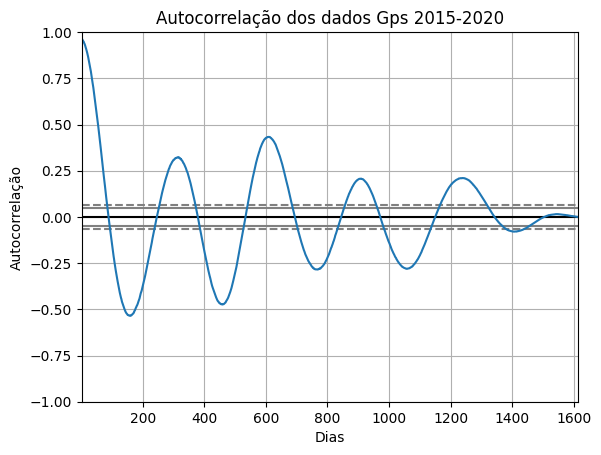

In [115]:
ult_5_anos = gps_o[(gps_o["DECIMAL DATE"])>2015]
autocorrelation_plot(ult_5_anos['U'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Gps 2015-2020")
plt.show()